In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserh/titanic-dataset")

print("Path to dataset files:", path)

/home/vamsi/Desktop/projects/ML projs/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /home/vamsi/.cache/kagglehub/datasets/yasserh/titanic-dataset/versions/1


In [2]:
import pandas as pd
import seaborn as sns

In [3]:
df=pd.read_csv('/home/vamsi/.cache/kagglehub/datasets/yasserh/titanic-dataset/versions/1/Titanic-Dataset.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
def seenull(df):
    for col in df.columns:
        print(f'{col}---- {df[df[col].isnull()].shape}')

In [6]:
df.shape

(891, 12)

In [18]:
seenull(df)

PassengerId---- (0, 12)
Survived---- (0, 12)
Pclass---- (0, 12)
Name---- (0, 12)
Sex---- (0, 12)
Age---- (0, 12)
SibSp---- (0, 12)
Parch---- (0, 12)
Ticket---- (0, 12)
Fare---- (0, 12)
Cabin---- (687, 12)
Embarked---- (0, 12)


Dealing with null values mean imputation and dropping is used

In [8]:
df=df.dropna(subset=['Embarked'])

In [9]:
df['Age']=df['Age'].fillna(df['Age'].mean())

In [11]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.642093,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,12.968346,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,29.642093,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Label encoding

In [59]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le=LabelEncoder()

In [16]:
df['Sex']=le.fit_transform(df['Sex'])

In [21]:
df['Embarked']=le.fit_transform(df['Embarked'])

In [22]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


dropping of some columns which i think are not that useful

In [24]:
# df=df.drop(columns=['Cabin'])
# df=df.drop(columns=['Name'])
# df=df.drop(columns=['Ticket'])

Finding correlation

<Axes: >

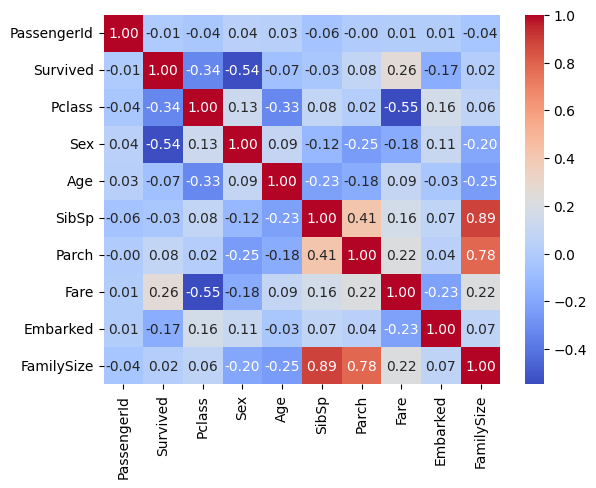

In [30]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")

Feature engineering

In [29]:
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1  # Adding 1 for the person themselves

In [26]:
# sns.pairplot(df)

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [70]:
X=df.drop(columns=['Survived'])
y=df['Survived']

In [71]:
X.shape,y.shape

((889, 9), (889,))

In [72]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [73]:
model1=LogisticRegression()

model1.fit(X=X_train,y=Y_train)

/home/vamsi/Desktop/projects/ML projs/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [74]:
model2=RandomForestClassifier()
model2.fit(X=X_train,y=Y_train)

RandomForestClassifier()

In [75]:
model3=GradientBoostingClassifier()
model3.fit(X=X_train,y=Y_train)

GradientBoostingClassifier()

In [77]:
model4=DecisionTreeClassifier()
model4.fit(X=X_train,y=Y_train)

DecisionTreeClassifier()

In [78]:
y_pred1=model1.predict(X=X_test)
y_pred2=model2.predict(X=X_test)
y_pred3=model3.predict(X=X_test)
y_pred4=model4.predict(X=X_test)

In [79]:
accuracy_score(y_true=Y_test,y_pred=y_pred1)

0.797752808988764

In [80]:
accuracy_score(y_true=Y_test,y_pred=y_pred2)

0.797752808988764

In [81]:
accuracy_score(y_true=Y_test,y_pred=y_pred3)

0.8258426966292135

In [82]:
accuracy_score(y_true=Y_test,y_pred=y_pred4)

0.7528089887640449